In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [33]:
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

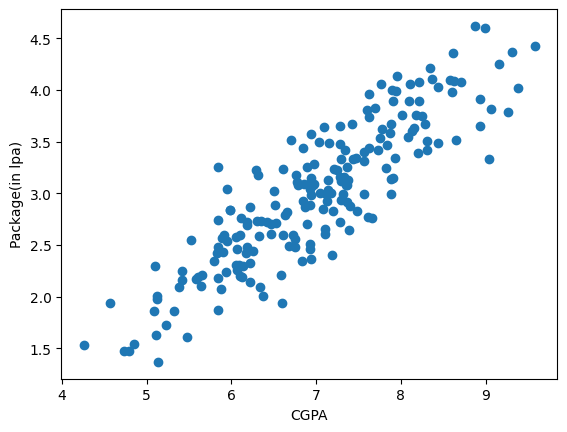

In [34]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [35]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [36]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [37]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
X_test.shape,X_train.shape

((40, 1), (160, 1))

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Text(0, 0.5, 'Package(in lpa)')

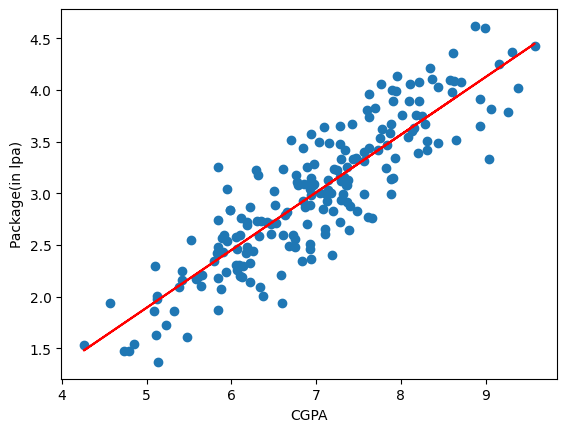

In [44]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [46]:
y_pred = lr.predict(X_test)

In [47]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [48]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [49]:
print('MEA',mean_absolute_error(y_test,y_pred))

MEA 0.2884710931878175


In [50]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [51]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [52]:
print("R2",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 0.780730147510384


In [53]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [54]:
1 - ((1-r2) * (40-1) / (40 - 1 - 1))

0.7749598882343415

In [58]:
new_df1 = df.copy()
new_df1['random_features'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_features','package']]
new_df1.head()

,cgpa,random_features,package
0,6.89,0.514434,3.26
1,5.12,0.828089,1.98
2,7.82,0.180831,3.25
3,7.42,0.716985,3.67
4,6.94,0.953531,3.57


Text(0, 0.5, 'Package(in lpa)')

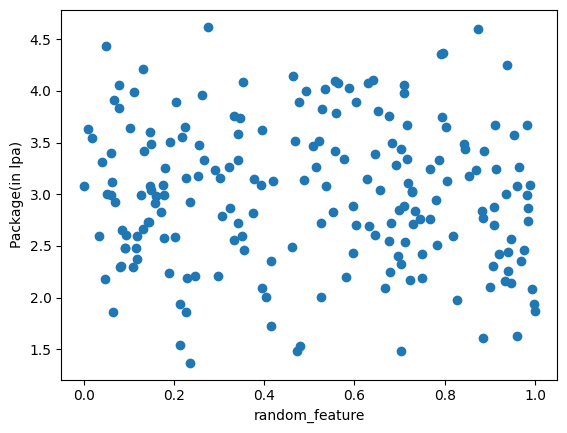

In [61]:
plt.scatter(new_df1['random_features'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [62]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
lr = LinearRegression()

In [67]:
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [70]:
y_pred = lr.predict(X_test)
y_pred

array([3.89336191, 3.10083384, 2.39455512, 2.57786047, 1.66259639,
       1.77339603, 2.06018882, 2.92839926, 3.75504458, 2.93236546,
       4.08688003, 3.51186512, 2.97478205, 2.39652331, 3.18046572,
       3.45997161, 1.93536992, 3.24880114, 2.96676107, 3.42597266,
       2.54754069, 3.1725453 , 2.84745609, 3.12207997, 3.68676196,
       2.86550409, 3.4916403 , 3.34788615, 3.91662846, 1.95625959,
       3.64045025, 3.20239838, 3.73403349, 2.77894352, 2.77527209,
       3.27352479, 3.53380953, 2.62081361, 2.65761122, 2.70351841])

In [72]:
r2 = r2_score(y_test,y_pred)
print('R2 score : ',r2)

R2 score :  0.78451464263993


In [ ]:
1 - ((1 - r2) * (40-1) / (40 - 1 - 2))

0.7728667854853316

In [76]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200) / 10)
new_df2 = new_df2[['cgpa','iq','package']]

In [80]:
new_df2.head()

,cgpa,iq,package
0,6.89,3.96,3.26
1,5.12,1.88,1.98
2,7.82,2.05,3.25
3,7.42,2.97,3.67
4,6.94,4.27,3.57


Text(0, 0.5, 'Package(in lpa)')

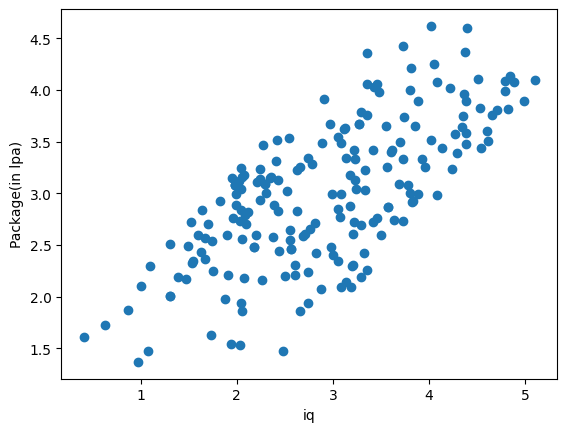

In [82]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [84]:
np.random.randint(-100,100)

92

In [85]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [87]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [90]:
r2 = r2_score(y_test,y_pred)
f'R2 score : {r2}'

'R2 score : 0.8207860108070448'

In [91]:
1 - ((1 - r2) * (40 - 1) / (40 - 1 - 2))

0.8110987681479662